In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
sns.set()
plt.rcParams['axes.unicode_minus']=False

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [1]:
df = pd.read_parquet('daily_20221004.parquet.gzip')
df = df.reset_index()

NameError: name 'pd' is not defined

## EDA

In [ ]:
# visulize one symbol id
symbol = 'MPH_7742'

# plot
df1 = df[df['symbol_id']==symbol].copy()
df1['quote.USD.timestamp'] = pd.to_datetime(df1['quote.USD.timestamp'])
df1 = df1.set_index('quote.USD.timestamp')

import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df1.index,
				open=df1['quote.USD.open'],
				high=df1['quote.USD.high'],
                low=df1['quote.USD.low'],
                close=df1['quote.USD.close'],name='ochl')
                ],skip_invalid=True,title=symbol)

fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=20,
        pad=9
    ))
fig.show()

In [4]:
# process data
symbols = df['symbol_id'].unique()
cols = ['quote.USD.timestamp','quote.USD.open',
       'quote.USD.high', 'quote.USD.low', 'quote.USD.close',
       'quote.USD.volume']

print(f'symbols count: {len(symbols)}')
for i in tqdm(range(len(symbols))):
	if i==0:
		data = df[df['symbol_id']==symbols[0]][cols].drop_duplicates(subset=['quote.USD.timestamp'])
		data.columns = ['quote.USD.timestamp'] + [col+'_'+symbols[i] for col in data.columns[1:]]
	else:
		dt = df[df['symbol_id']==symbols[i]][cols].drop_duplicates(subset=['quote.USD.timestamp']).copy()
		dt.columns = ['quote.USD.timestamp']  + [col+'_'+symbols[i] for col in dt.columns[1:]]
		data = pd.merge(data,
					 dt,
					on = 'quote.USD.timestamp',
					how='outer')


symbols count: 1375


100%|██████████| 100/100 [00:07<00:00, 13.74it/s]


In [5]:
data.describe()

,quote.USD.open_MPH_7742,quote.USD.high_MPH_7742,quote.USD.low_MPH_7742,quote.USD.close_MPH_7742,quote.USD.volume_MPH_7742,quote.USD.open_EWT_5268,quote.USD.high_EWT_5268,quote.USD.low_EWT_5268,quote.USD.close_EWT_5268,quote.USD.volume_EWT_5268,...,quote.USD.open_CRON_4309,quote.USD.high_CRON_4309,quote.USD.low_CRON_4309,quote.USD.close_CRON_4309,quote.USD.volume_CRON_4309,quote.USD.open_XTZ_2011,quote.USD.high_XTZ_2011,quote.USD.low_XTZ_2011,quote.USD.close_XTZ_2011,quote.USD.volume_XTZ_2011
count,590.000000,590.000000,590.000000,590.000000,5.900000e+02,895.000000,895.000000,895.000000,895.000000,7.190000e+02,...,1037.000000,1037.000000,1037.000000,1037.000000,6.490000e+02,1825.000000,1825.000000,1825.000000,1825.000000,7.410000e+02
mean,55.899476,56.772328,54.986072,55.863848,1.039856e+06,7.643199,7.717012,7.562437,7.638302,2.590469e+06,...,0.856095,0.861522,0.850426,0.855869,1.821877e+05,2.624486,2.654426,2.594591,2.624269,2.771977e+08
std,45.656072,46.467168,44.778826,45.720580,1.691154e+06,4.000852,4.039300,3.945819,3.989505,3.091525e+06,...,0.769210,0.772551,0.765733,0.769270,2.279879e+05,1.583956,1.612091,1.556839,1.583076,3.187619e+08
min,2.111921,2.115174,2.110117,2.111144,4.350990e+04,0.542475,0.543031,0.537995,0.538789,2.042877e+05,...,0.089192,0.089782,0.088848,0.089097,1.443385e+01,0.345901,0.345901,0.330829,0.330829,1.316622e+07
25%,26.530924,27.003404,26.218654,26.306106,2.133469e+05,5.023267,5.055752,4.985928,5.023501,9.471326e+05,...,0.265022,0.268567,0.261740,0.264081,1.890730e+04,1.395850,1.406975,1.380225,1.394593,9.122067e+07
50%,39.010467,39.550592,38.396055,39.194888,4.043116e+05,6.911368,6.979811,6.822228,6.856601,1.612739e+06,...,0.548039,0.555442,0.547085,0.549572,1.046982e+05,2.300960,2.322546,2.280020,2.296910,1.672281e+08
75%,70.318826,70.640412,69.864409,70.127687,1.164859e+06,10.061738,10.125479,9.977400,10.029581,3.184574e+06,...,1.087401,1.093768,1.082686,1.090536,2.605639e+05,3.508630,3.546020,3.471410,3.511874,3.402921e+08
max,219.015041,221.414025,217.725623,221.165630,1.763585e+07,20.593625,21.041256,20.175193,20.988173,4.700771e+07,...,2.682077,2.685355,2.672948,2.678141,1.229210e+06,10.561000,10.561000,9.282350,9.282350,2.582825e+09


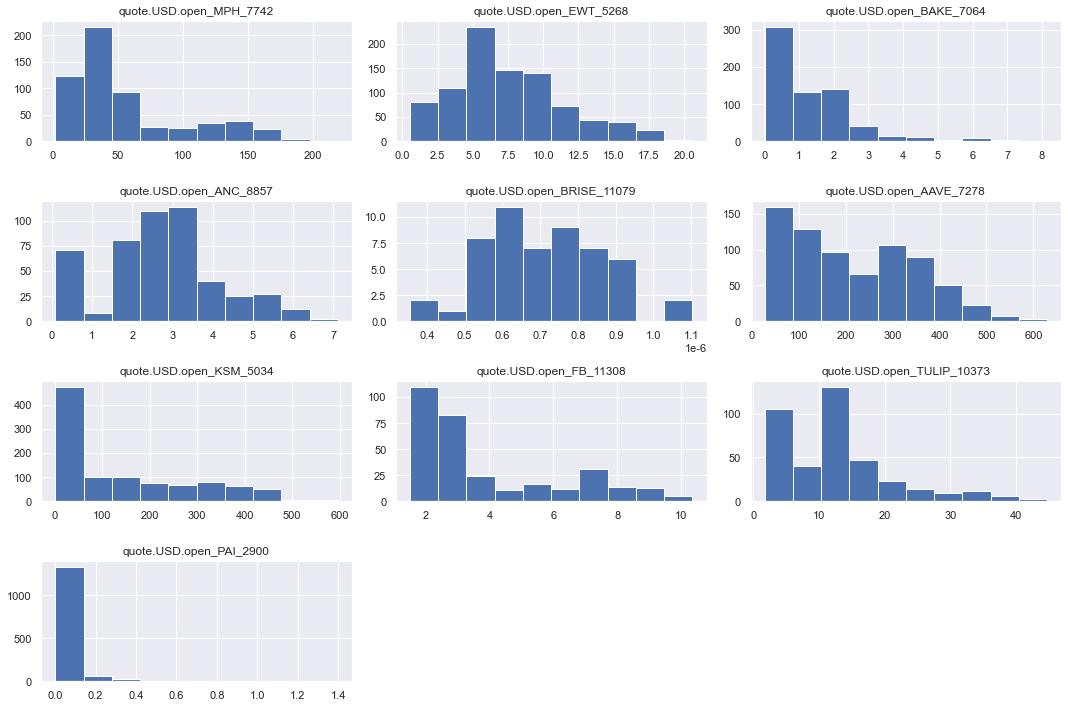

In [6]:
# distribution plot
# chose sybomls
symbols = ['MPH_7742', 'EWT_5268', 'BAKE_7064', 'ANC_8857', 'BRISE_11079',
       'AAVE_7278', 'KSM_5034', 'FB_11308', 'TULIP_10373', 'PAI_2900']
# chose metric
metric = 'quote.USD.open'

def plot_distribution(data,symbols:list,metric:str):
	cols = ['_'.join([metric,symbol]) for symbol in symbols]
	data[cols].hist(figsize=(15,10))
	plt.tight_layout()
	plt.show()

plot_distribution(data,symbols,metric)

['quote.USD.close_MPH_7742', 'quote.USD.close_EWT_5268', 'quote.USD.close_BAKE_7064', 'quote.USD.close_ANC_8857', 'quote.USD.close_BRISE_11079', 'quote.USD.close_AAVE_7278', 'quote.USD.close_KSM_5034', 'quote.USD.close_FB_11308', 'quote.USD.close_TULIP_10373', 'quote.USD.close_PAI_2900']


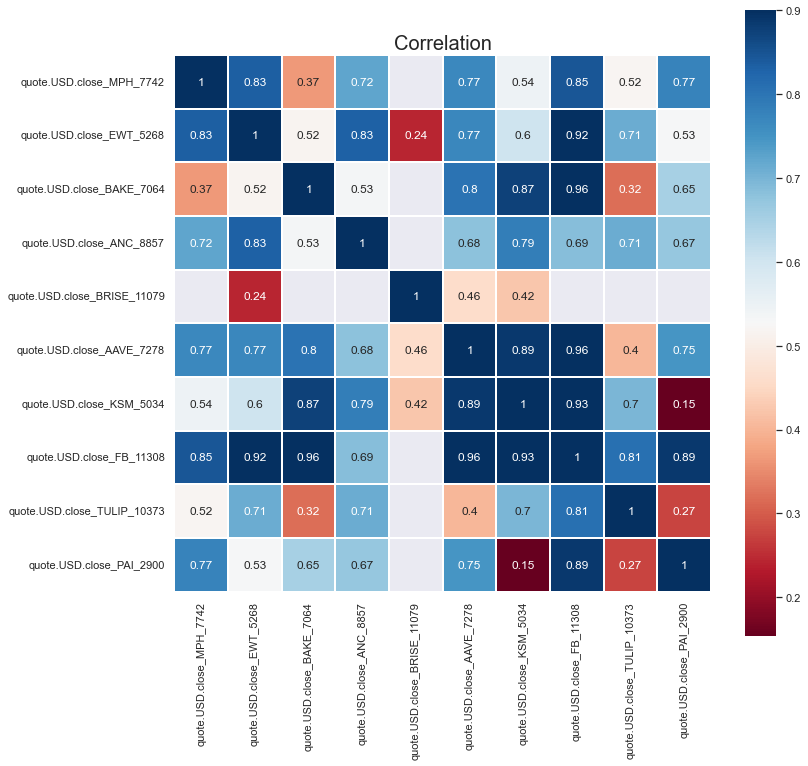

In [7]:
# chose sybomls
symbols = ['MPH_7742', 'EWT_5268', 'BAKE_7064', 'ANC_8857', 'BRISE_11079',
       'AAVE_7278', 'KSM_5034', 'FB_11308', 'TULIP_10373', 'PAI_2900']
# chose metric
metric ='quote.USD.close'

def plot_correlation(data,symbols,metric,need_corr=True,name='',title=''):
	cols = ['_'.join([metric,symbol]) for symbol in symbols]
	print(cols)
	data = data[cols]
	plt.subplots(figsize = (12,11))
	sns.heatmap(data.corr(method='spearman') if need_corr else data, 
				annot=True,
				cmap = 'RdBu',
				linewidths = 0.1,
				linecolor='white',
				vmax = 0.9,
				square=True
				)
	plt.title(title if title==None else title+name,fontsize = 20)
	plt.tight_layout()
	plt.savefig(title+name+'.jpg',dpi=300)
	plt.show()
	return data
# null means no data for caculating
res = plot_correlation(data,symbols,metric,title='Correlation')

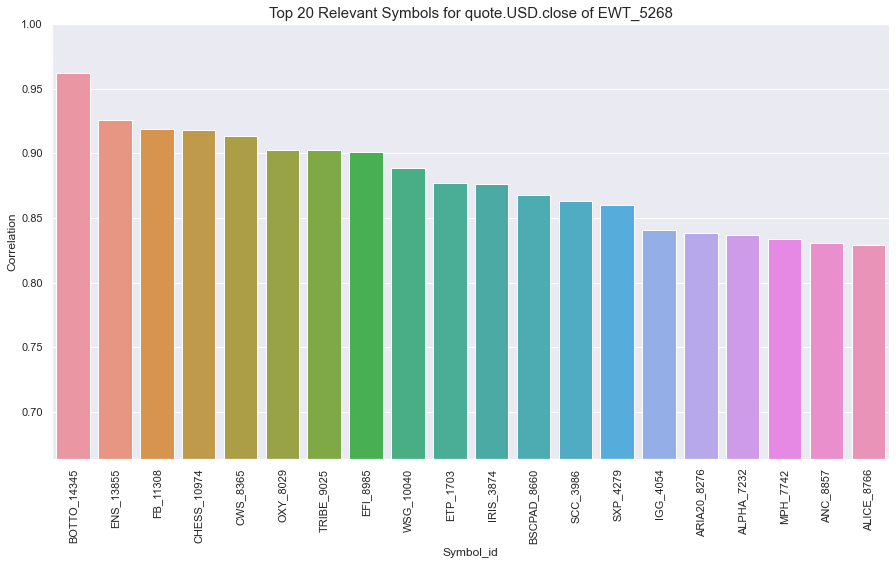

In [8]:
# find the top related symbols
metric ='quote.USD.close'
symbol = 'EWT_5268'
top_N = 20

# caculate and plot
rank = data[[col for col in data.columns if metric in col]].corr(method='spearman').loc['_'.join([metric,symbol])].sort_values(ascending=False).iloc[1:top_N+1]
plt.figure(figsize=(15,8))
sns.barplot(data= rank,x=['_'.join(i.split('_')[1:]) for i in rank.index],y = rank)
plt.ylim(rank.min()*0.8,1)
plt.xticks(rotation=90)
plt.title(f"Top {top_N} Relevant Symbols for {metric} of {symbol}",fontsize=15)
plt.ylabel("Correlation")
plt.xlabel('Symbol_id')
plt.show()

In [9]:
# find the top related symbols
target ='quote.USD.close'
symbol = 'EWT_5268'
# n features
top_N = 30
metric = target
target = '_'.join([target,symbol])

# caculate and plot
rank = data[[col for col in data.columns if metric in col]].corr(method='spearman').loc['_'.join([metric,symbol])].sort_values(ascending=False).iloc[1:top_N+1]
print(f"Model Building for target = {target}\n- features selected according to correlation")
print(rank)
features = list(rank.index)

Model Building for target = quote.USD.close_EWT_5268
- features selected according to correlation
quote.USD.close_BOTTO_14345     0.961921
quote.USD.close_ENS_13855       0.925664
quote.USD.close_FB_11308        0.919137
quote.USD.close_CHESS_10974     0.917723
quote.USD.close_CWS_8365        0.913267
quote.USD.close_OXY_8029        0.902507
quote.USD.close_TRIBE_9025      0.902360
quote.USD.close_EFI_8985        0.900775
quote.USD.close_WSG_10040       0.888909
quote.USD.close_ETP_1703        0.876983
quote.USD.close_IRIS_3874       0.875954
quote.USD.close_BSCPAD_8660     0.867513
quote.USD.close_SCC_3986        0.863479
quote.USD.close_SXP_4279        0.859640
quote.USD.close_IGG_4054        0.840886
quote.USD.close_ARIA20_8276     0.838052
quote.USD.close_ALPHA_7232      0.836973
quote.USD.close_MPH_7742        0.833419
quote.USD.close_ANC_8857        0.830562
quote.USD.close_ALICE_8766      0.829159
quote.USD.close_LAYER_6638      0.824624
quote.USD.close_VISR_9170       0.798916


In [10]:
dataset = data.dropna(subset=features+[target])
X = dataset[features]
y = dataset[target]

In [11]:
## 训练集80%，测试集20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
													test_size=0.20,random_state=50)


import numpy as np
import time
# 定义模型性能评估方法
def evaluation(y_test,y_pred,model_type = 'regression'):
	"""
	传入真实值y_test和预测值y_pred，评估模型效果
	model_type = regression评估回归模型
	model_type = classification评估分类模型
	"""
	metrics = {}
	# if classification model
	if model_type == 'classification':
		from sklearn.metrics import accuracy_score   #正确率
		from sklearn.metrics import precision_score	#精准率
		from sklearn.metrics import recall_score	  #召回率
		from sklearn.metrics import f1_score		 #调和平均值F1
		# metrics['cls_report'] = classification_report(y_test, y_pred)
		metrics['accuracy'] = accuracy_score(y_test,y_pred)
		metrics['precision'] =  precision_score(y_test,y_pred,average='macro')
		metrics['recall'] = recall_score(y_test,y_pred,average='macro')
		metrics['f1-score'] = f1_score(y_test,y_pred,average='macro')
		
	# if regression model
	elif model_type== 'regression':
		from sklearn.metrics import mean_squared_error
		from sklearn.metrics import mean_absolute_error
		from sklearn.metrics import r2_score
		metrics['MSE'] = mean_squared_error(y_test,y_pred)
		metrics['RMSE'] = mean_squared_error(y_test,y_pred) ** 0.5
		metrics['MAE'] = mean_absolute_error(y_test,y_pred)
		metrics['R2'] = r2_score(y_test,y_pred)
	else:
		raise Exception('model_type should be classification or regression!')
	return metrics
# Xgboost
def Xgboost_reg_model(X_train,y_train,X_test,y_test):
	# create the model
	from xgboost import XGBRegressor
	xgb = XGBRegressor(tree_method="hist", enable_categorical=True)
	# fit
	xgb.fit(X_train, y_train)
	y_pred_XGB = xgb.predict(X_test)
	metrics  = evaluation(y_test,y_pred_XGB,model_type='regression')
	return xgb,metrics
# 支持向量机模型
def SVM_reg_model(X_train,y_train,X_test,y_test):
	##从sklearn.svm导入模型 支持向量机回归
	from sklearn.svm import SVR
	# 建立模型
	svr = SVR(kernel="linear")
	# 使用训练集进行训练
	svr.fit(X_train, y_train)
	# 预测测试集结果
	y_pred_SVR = svr.predict(X_test)
	metrics  = evaluation(y_test,y_pred_SVR,model_type='regression')
	return svr,metrics

## 随机森林模型
def RF_reg_model(X_train,y_train,X_test,y_test):
	time_start = time.time()
	from sklearn.ensemble import RandomForestRegressor
	RF = RandomForestRegressor(n_estimators=10)
	RF.fit(X_train,y_train)
	time_end = time.time()
	print(f"training time: {(time_end-time_start):.4f}s")
	# 预测模型
	# 测试集预测
	y_pred_RF = RF.predict(X_test)
	# 性能评估
	metrics= evaluation(y_test,y_pred_RF,model_type='regression')
	return RF,metrics

# 多元线性回归模型
def MLR_reg_model(X_train,y_train,X_test,y_test):
	time_start = time.time()
	from sklearn.linear_model import LinearRegression
	MLR = LinearRegression(fit_intercept=True)
	# 训练模型
	MLR.fit(X_train, y_train)
	time_end = time.time()
	print(f"training time: {(time_end-time_start):.4f}s")
	# 预测测试集结果
	y_pred_MLP = MLR.predict(X_test)
	metrics  = evaluation(y_test,y_pred_MLP,model_type='regression')
	return MLR,metrics
# 选择要训练的分类模型
reg_models = [MLR_reg_model,RF_reg_model,Xgboost_reg_model,SVM_reg_model]

# 模型类型为分类模型
model_type = 'regression'
eval_dic = {}
models = []
# 依次训练
for model in reg_models:
	print(f"【{model.__name__}】")
	model,metrics = model(X_train,y_train,X_test,y_test)
	models.append(model)
	# 得到评估结果
	eval_dic[type(model).__name__] = metrics.copy()
	print(f"finished {type(model).__name__} model training...")
	print("evaluation:")
	print(metrics)
	print('\n')

import matplotlib.pyplot as plt
def plot_metric(metric_dic,metric = 'SCORE',dataset_name = 'None'):
	"""
	metric_dic looks like: {'model_name':{'metric_name': value}}
	"""
	# 画图，画出各个模型的指标对比
	x = []
	y = []
	# 提取数据
	for model_name in metric_dic.keys():
		x.append(model_name)
		y.append(metric_dic.get(model_name).get(metric))
	plt.figure(figsize=(8,6))
	# 画柱形图
	plt.bar(x,y)
	for i,j in zip(range(len(x)),y):
		plt.text(i,j,'{:.4}'.format(j),va='bottom',ha='center')
	# 设置标题坐标轴名称
	plt.title(f"Model Comparison - Dataset({dataset_name}) - {metric}",fontsize=15)
	plt.xlabel("Model Name")
	plt.ylabel(metric)
	plt.xticks(rotation=0)
	plt.ylim(np.min(y)*0.8,np.max(y)*1.05)
	plt.tight_layout()
	# 保存图片
	plt.savefig(f"Model Comparison - Dataset({dataset_name}) - {metric}.jpg",dpi=200)
	plt.show()

plot_metric(eval_dic,metric='RMSE')
plot_metric(eval_dic,metric='R2')
plot_metric(eval_dic,metric='MAE')

【MLR_reg_model】
training time: 0.3493s
finished LinearRegression model training...
evaluation:
{'MSE': 0.025904616315791433, 'RMSE': 0.16094911095060896, 'MAE': 0.12157293031354527, 'R2': 0.9820672797900084}


【RF_reg_model】
training time: 0.1343s
finished RandomForestRegressor model training...
evaluation:
{'MSE': 0.02501968470526406, 'RMSE': 0.15817611926350975, 'MAE': 0.13412789811419848, 'R2': 0.9826798822228378}


【Xgboost_reg_model】


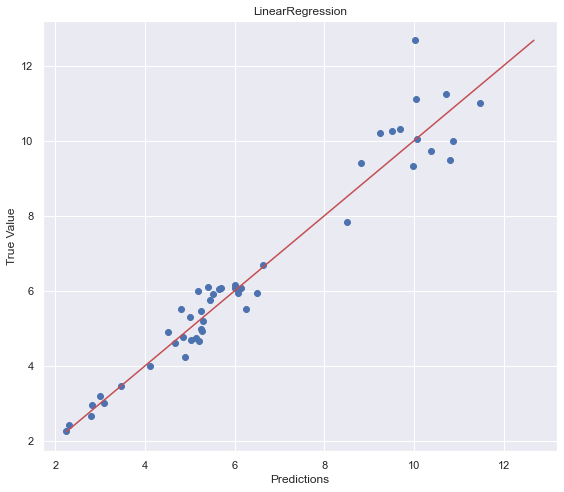

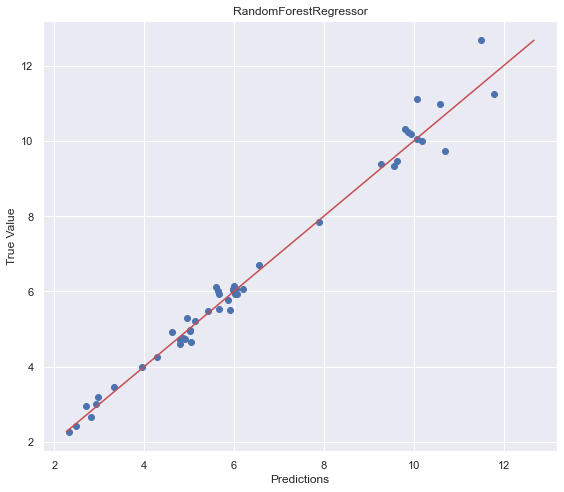

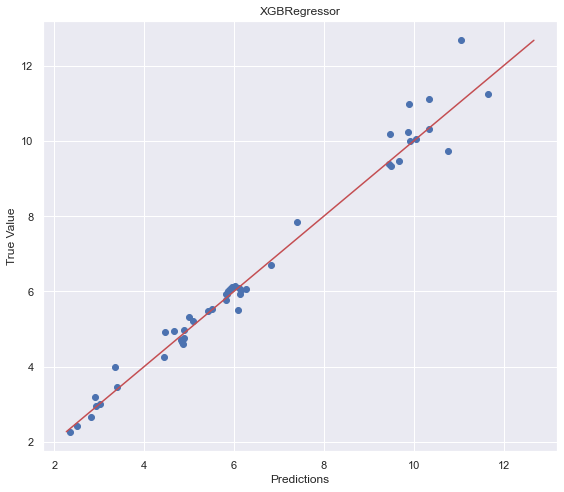

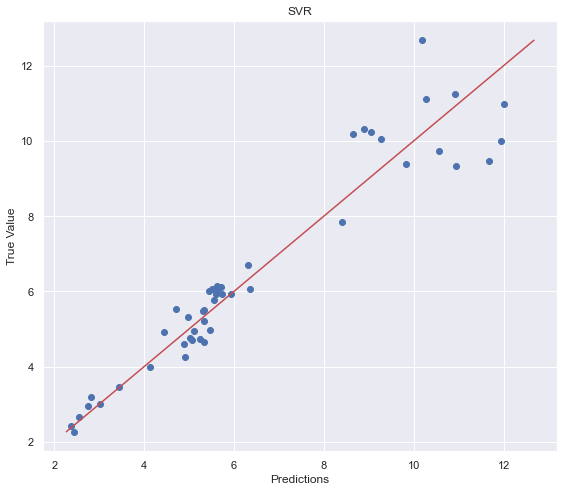

In [ ]:
def scatterplot_comparison(model,X_test,y_test):
	"""画出回归模型预测值和真实值的对比"""
	y_pred = model.predict(X_test)
	y_pred = list(y_pred)
	y_test = list(y_test)
	plt.figure(figsize=(8,7))
	plt.scatter(y_pred,y_test)
	plt.plot([min(y_pred+y_test),max(y_pred+y_test)],[min(y_pred+y_test),max(y_pred+y_test)],'r')
	plt.ylabel('True Value')
	plt.xlabel('Predictions')
	plt.title(f"{type(model).__name__}")
	plt.tight_layout()
	plt.savefig(f"{type(model).__name__} - predict value.jpg",dpi=300)
	plt.show()

for model in models:
	scatterplot_comparison(model,X_test,y_test)

(1, 2)